# Trial Notebook for Notebook_LEDET_V2

In [1]:
import sys
!{sys.executable} -m pip install --user --upgrade -i https://test.pypi.org/simple/ steam-nb-api
    
%matplotlib notebook
from steam_nb_api.ledet.NotebookLEDET_V2 import Notebook_LEDET
%load_ext autoreload
%autoreload 2

# Global variables, Magnet geometry, Field maps, strand positions etc.

In [2]:
nameMagnet = 'MU'
new_notebook = Notebook_LEDET(nameMagnet)

Initializing  MU
O - Loading field maps from:  MU_All_WithIron_WithSelfField.map2d

X - Loading ROXIE was successful.


# Overall magnet variables & Definition of group of conductors

In [20]:
T00 = 4.2
l_magnet = 0.12
# Current to be simulated
I00 = 450

### The 2 following arguments need to be set, as they are required by functions
# Arguments can always be set with new_notebook.setAttribute(Attribute, value)
# If you want to load all variables into the object, use new_notebook.storeVariables(locals())
new_notebook.setAttribute('GroupToCoilSection', 2 * (
                          int(new_notebook.nGroups/8) * [1] +
                          int(new_notebook.nGroups/8) * [2] +
                          int(new_notebook.nGroups/8) * [3] +
                          int(new_notebook.nGroups/8) * [4] )
                         )
new_notebook.setAttribute('I00', I00)

In [12]:
# Patch that should be fixed with versions >0.3.384
import numpy as np
new_notebook.halfTurnToTurn = np.tile(np.arange(1, new_notebook.nTurns + 1), 2)

# Conductor properties

In [21]:
# New conductors first need a new yaml + need to be entered in the package --> thinking about a unified database
new_notebook.load_ConductorData(['W1'],[1]*int(new_notebook.nGroups)) 
# new_notebook.setHeliumFraction(0) # Percentage

O - Loading Conductor data for Type:  W1
X - Loading Conductor data was successful.
O - Calculate Self-mutual inductance matrix.
Self-mutual inductance between strands - Calculation started
Calculation does not include correction for strand diameter.
Status: [------------------->] 100%
Self-mutual inductance between strands - Calculation finished
Self-mutual inductance between half-turns - Calculation started
Self-mutual inductance between half-turns - Calculation finished
Self-mutual inductance between turns - Calculation started
Self-mutual inductance between turns - Calculation finished
Mutual inductance of some turns is k>1, re-calculate with hBare.
Self-mutual inductance between strands - Calculation started
Calculation does not include correction for strand diameter.
Status: [------------------->] 100%
Self-mutual inductance between strands - Calculation finished
Self-mutual inductance between half-turns - Calculation started
Self-mutual inductance between half-turns - Calculatio

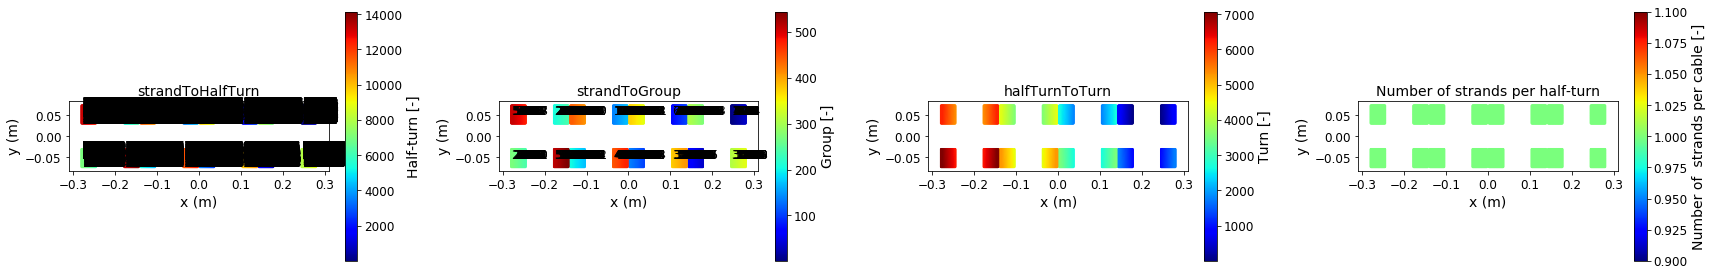

In [14]:
new_notebook.plot_strands_groups_layers()

# Electrical order of Half-Turns

In [18]:
elPairs_GroupTogether = [[1,17], [2,18], [3,19], [4,20], [5,21], [6,22], [7,23], [8,24], [9,25], [10,26], [11,27], [12,28], [13,29], [14,30], [15,31], [16,32]]
elPairs_RevElOrder = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
new_notebook.set_ElectricalOrder(elPairs_GroupTogether, elPairs_RevElOrder)

O - Attempting to set electrical order


IndexError: index 16 is out of bounds for axis 0 with size 16

# Cable geometry parameters

In [38]:
nHalfTurnsDefined = new_notebook.nHalfTurns
# Inclination of cables with respect to X axis (including transformations for mirror and rotation)
alphasDEG = nHalfTurnsDefined * [0 ]
# Rotate cable by a certain angle [deg]
rotation_block = ( int(nHalfTurnsDefined/16)*[0] + int(nHalfTurnsDefined/16)*[180] ) * 8
# Mirror cable along the bisector of its quadrant (0=no, 1=yes)
mirror_block = nHalfTurnsDefined * [0]
# Mirror cable along the Y axis (0=no, 1=yes)
mirrorY_block = nHalfTurnsDefined * [0]

# Heat exchange

In [20]:
max_distance = 0.5E-3
new_notebook.set_ThermalConnections(max_distance)

O - Attempting to set thermal connections
X - Thermal connections are set.


# Electrical Circuit

In [21]:
# Resistance of the warm parts of the circuit [Ohm]
R_circuit = 3.5E-3
# Resistance of crowbar of the power supply [Ohm]
R_crowbar = 1E-3
# Forward voltage drop of a diode or thyristor in the crowbar of the power supply [V]
Ud_crowbar = 0.7

# Quench protection
If the respective QPS system is present, it will be set. If not, all to 0 + t=9999

## Energy Extraction

In [22]:
# Time when the energy-extraction system is triggered [s]
tEE = 0.002
# Resistance of the energy-extraction system [Ohm]
R_EE_triggered = 0.7

## CLIQ system

In [23]:
# Time when the CLIQ system is triggered [s]
tCLIQ = 99999
# Direction of the introduced current change for the chosen CLIQ configuration
directionCurrentCLIQ = [1, -1, 1, -1]
# Number of CLIQ units
nCLIQ = 1
# CLIQ charging voltage [V]
U0 = 1000
# Capacitance of the CLIQ capacitor bank [F]
C = 0.04
# Resistance of the CLIQ leads [Ohm]
Rcapa = 0.05

## Quench Heater

In [24]:
# Number of quench heater strips to write in the file
nHeaterStrips = 4
# Number of QH circuits
nQHcircuits = 2

# Time at which the power supply connected to the QH strip is triggered (Low-field QHs set to a very large value to avoid triggering).
tQH = nHeaterStrips * [99999]
# Charging voltage of the capacitor connected to the QH strip.
U0_QH = nHeaterStrips * [900/nQHcircuits]
# Capacitance of the capacitor connected to the QH strip.
C_QH = nHeaterStrips * [7.05E-3*nQHcircuits]
# Resistance of the warm leads of the QH strip discharge circuit.
R_warm_QH = nHeaterStrips * [0.25* nQHcircuits] # 0.25-->0.28 Ohm partially compensates the fact that the real strip is 9.646 m long instead of l_magnet=9.450 m long
# Width of the non-Cu-plated part of the the QH strip.
w_QH = nHeaterStrips * [44.45E-3]
# Height of the non-Cu-plated part of the QH strip.
h_QH = nHeaterStrips * [0.0254E-3]
# Thickness of the insulation layer between QH strip and coil insulation layer.
s_ins_QH = nHeaterStrips * [75E-6] 
# Type of material of the insulation layer between QH strip and coil insulation layer (1=G10; 2=kapton)
type_ins_QH = nHeaterStrips * [2]
# Thickness of the insulation layer between QH strip and the helium bath (or the collars); on this side, the QH strip is thermally connected to an infinite thermal sink at constant temperature.
s_ins_QH_He = nHeaterStrips * [500E-6]
# Type of material of the insulation layer between QH strip and helium bath (1=G10; 2=kapton)
type_ins_QH_He = nHeaterStrips * [2]
# Length of the QH strip.
l_QH = nHeaterStrips * [10.16]
# Fraction of QH strip covered by heating stations (not-Cu-plated).
f_QH = nHeaterStrips * [.127/(.127+.635)]

# Heat exchange between quench heater strips and half-turns
iQH_toHalfTurn_From_oneHalfQuadrant = [1,1,1,1,1,1,1,1]
iQH_toHalfTurn_To_oneHalfQuadrant = [1,2,3,4,5,6,7,8]


# Differential inductance versus current (Iron-yoke effect) - IMPORT FROM ROXIE

In [25]:
# Copy/paste the values after calculation using ROXIE or COMSOL or another software
fL_I = [0, 4.5, 26.85, 49.2, 71.55, 93.9, 116.25, 138.6, 160.95, 183.3, 205.65, 228, 250.35, 272.7, 295.05, 317.4, 339.75, 362.1, 384.45, 406.8, 429.15, 451.5, 473.85 ]
fL_L = [4.59694376849311, 4.59694376849311, 4.59694376849311, 2.09284637476489, 1.506523611415, 1.39311531519842, 1.31180927371959, 1.23122536420709, 1.16599509409516, 1.12652074529925, 1.10169720387284, 1.08629691954611, 1.07516221497949, 1.06491808060806, 1.05635222077025, 1.04891378975671, 1.04252697797786, 1.03654270235885, 1.03000515361228, 1.02514121169868, 1.02158779580648, 1.01907688118159, 1.01723757186642 ]

# Simulation Type

In [26]:
new_notebook.set_SimulationType('2D+1D') # 2D, 3D 

O - Prepare simulation as: 2D+1D


TypeError: adjust_vQ() got an unexpected keyword argument 'Return'

# Timing

In [27]:
t_PC = 0
tStart = -0.05
Transient = 'FPA' #not supported yet: SPA, trapezoidal, ....

# Time from which the adiabatic hot-spot temperature calculation starts. For each coil section, calculate the adiabatic hot-spot temperature in the highest-field strand/cable [s]
tQuench = tStart
# Initial quench temperature in the hot-spot temperature calculation [K]
initialQuenchTemp = 10

# Time Vector Definition. Parameters used to generate the time vector.
# Each triplet of numbers defines a time window: first element is the start time, second element is the time step in that window, third element is the end time. It must contain a number of elements multiple of 3. Any time point above t=1000 s will be ignored.
time_vector_params = [tStart, 5E-4, 0, 5E-4, 5E-4, 0.5, 0.501, 0.001, 1]

# Set Quench

In [28]:
new_notebook.storeVariables(locals())
new_notebook.initiateQuench([1],[-0.05]) # Turns, Time, (length), default uses MPZ for 2D+1D, 2D uses l_magnet

O - Storing variables.
X - Variables successfully loaded.
O - Attempting to initiate quench.
Please first specify simulation type: set_SimulationType(Type)


# Add Busbar inductance

In [16]:
# new_notebook.includeBusbar(5000, InductanceGuessPerLength=0.8E-6) #in m (InductanceGuessPerLength) optional

O - Including busbar inductance.
X -  5000  m of busbar as additional inductance included.


# Options

In [29]:
new_notebook.load_Options('Default')
new_notebook.load_VariablesToStore('Default')
new_notebook.load_PlotOptions('Default')

O - Loading  Default options.
Option type  Default  currently not supported or not understood. Available options:  ['cos_theta', 'solenoid']
O - Loading  Default  storage options.
X - Loading  Default variables to store was successful.
O - Loading  Default  plot options.
X - Loading  Default plot-options was successful.


# Write the LEDET input file

In [30]:
nameFileLEDET = 'TEST_' + nameMagnet + '_0' + '.xlsx'
new_notebook.writeLEDETFile(nameFileLEDET, locals())

O - Storing variables.
X - Variables successfully loaded.
M_m is not square
M_m or Number of Coilsections is corrupted. please check.
Variables are not consistent! Writing aborted -  TEST_MU_0.xlsx


# Plotting

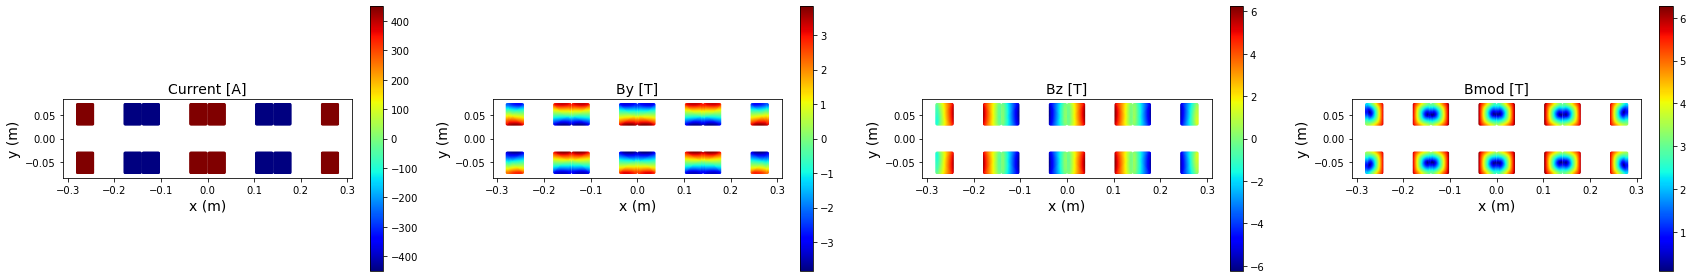

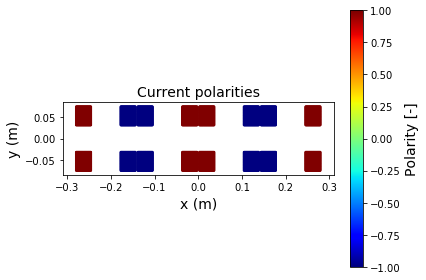

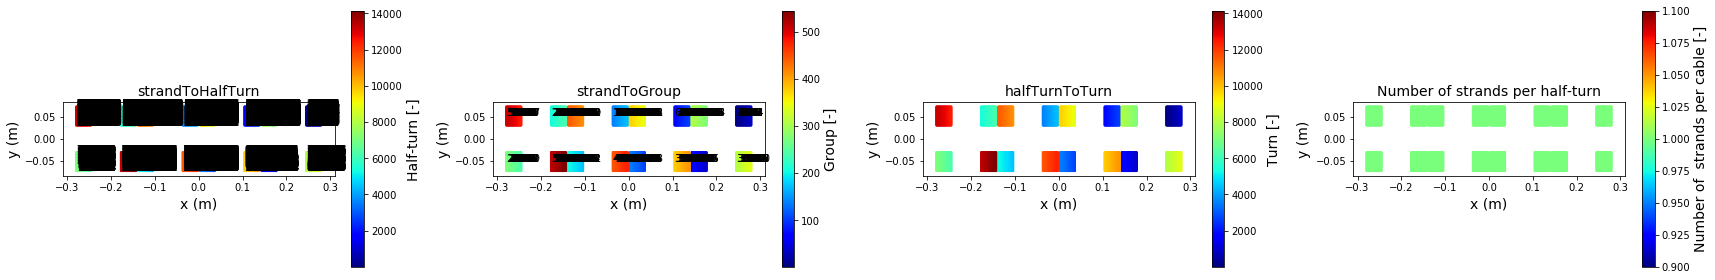

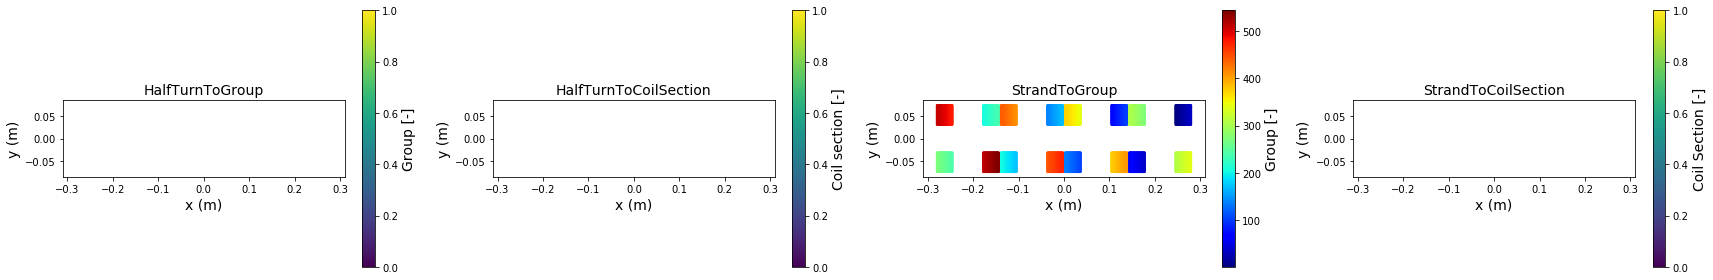

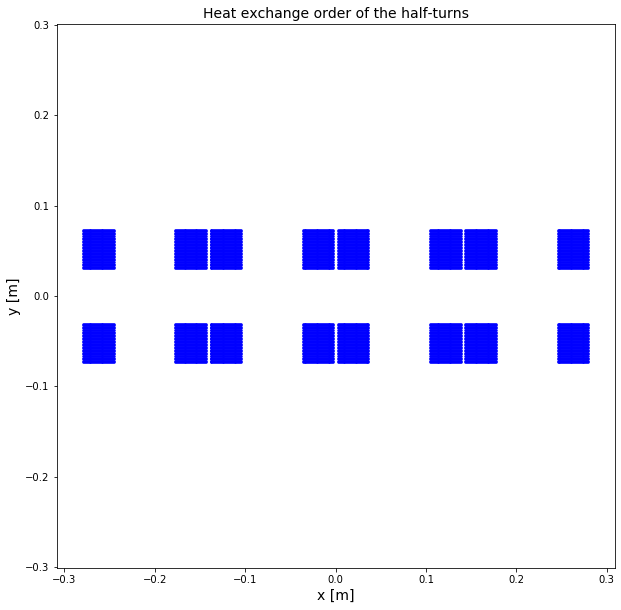

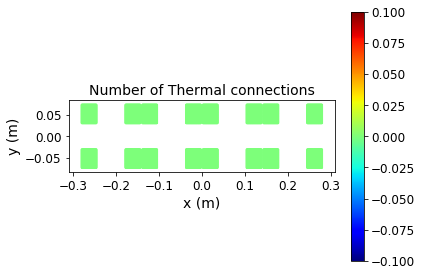

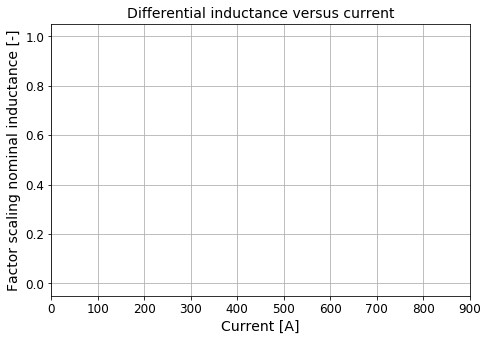

In [5]:
%matplotlib inline
new_notebook.plot_all()